In [1]:
from sklearn.ensemble import RandomForestClassifier
import joblib
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

<h1> Model Feature Importance </h1>

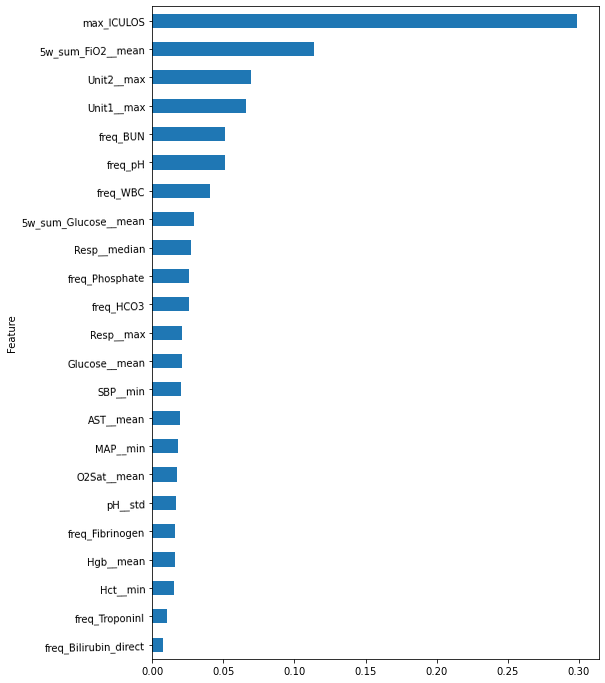

In [68]:
RFmodel = joblib.load('best_RF_run3_23') #load model
with open(f'Best_features_dict_RF_run_4.pickle', 'rb') as handle:
    features_dict_RF = pickle.load(handle)
RFfeature_names = features_dict_RF[23]
RF_tree_feature_importances = pd.DataFrame(RFmodel.feature_importances_)
resRF =RF_tree_feature_importances.join(pd.DataFrame({'Feature':RFfeature_names}))
resRF = resRF.sort_values(by=0)
ax = resRF.plot.barh(x='Feature',y=0,rot=1,figsize=(8,12))
ax.get_legend().remove()

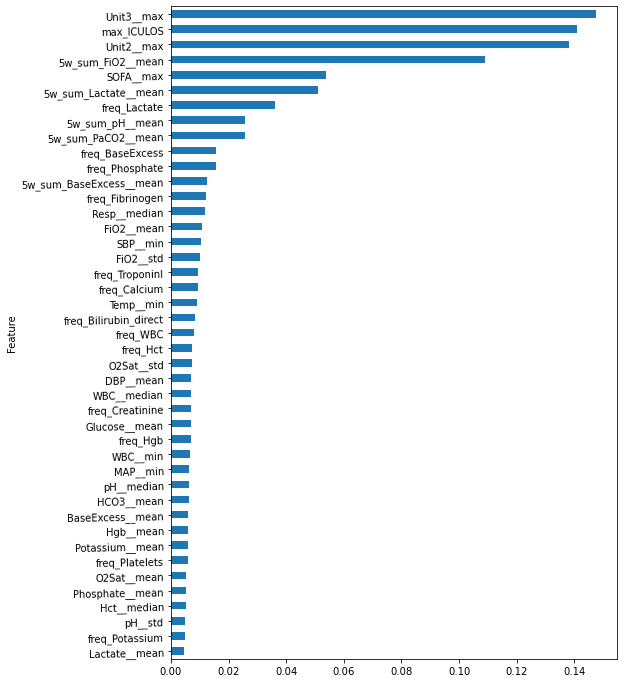

In [69]:
XGBmodel = joblib.load('best_XGB_run3_43')
with open(f'Best_features_dict_XGB_run_4.pickle', 'rb') as handle:
    features_dictXGB = pickle.load(handle)
XGB_feature_names = features_dictXGB[43]
XGB_tree_feature_importances = pd.DataFrame(XGBmodel.feature_importances_)
resXGB =XGB_tree_feature_importances.join(pd.DataFrame({'Feature':XGB_feature_names}))
resXGB = resXGB.sort_values(by=0)
ax2 = resXGB.plot.barh(x='Feature',y=0,rot=1,figsize=(8,12))
ax2.get_legend().remove()

In [71]:
RF_features_sorted = resRF['Feature'].values
XGB_features_sorted = resXGB['Feature'].values

In [74]:
RF_same_features = []
RF_diff = []
for i, feature in enumerate (RF_features_sorted):
    if feature in XGB_features_sorted:
        RF_same_features.append(i)
    else:
        RF_diff.append(i)
XGB_same_features = []
XGB_diff = []
for i, feature in enumerate(XGB_features_sorted):
    if feature in RF_features_sorted:
        XGB_same_features.append(i)
    else:
        XGB_diff.append(i)

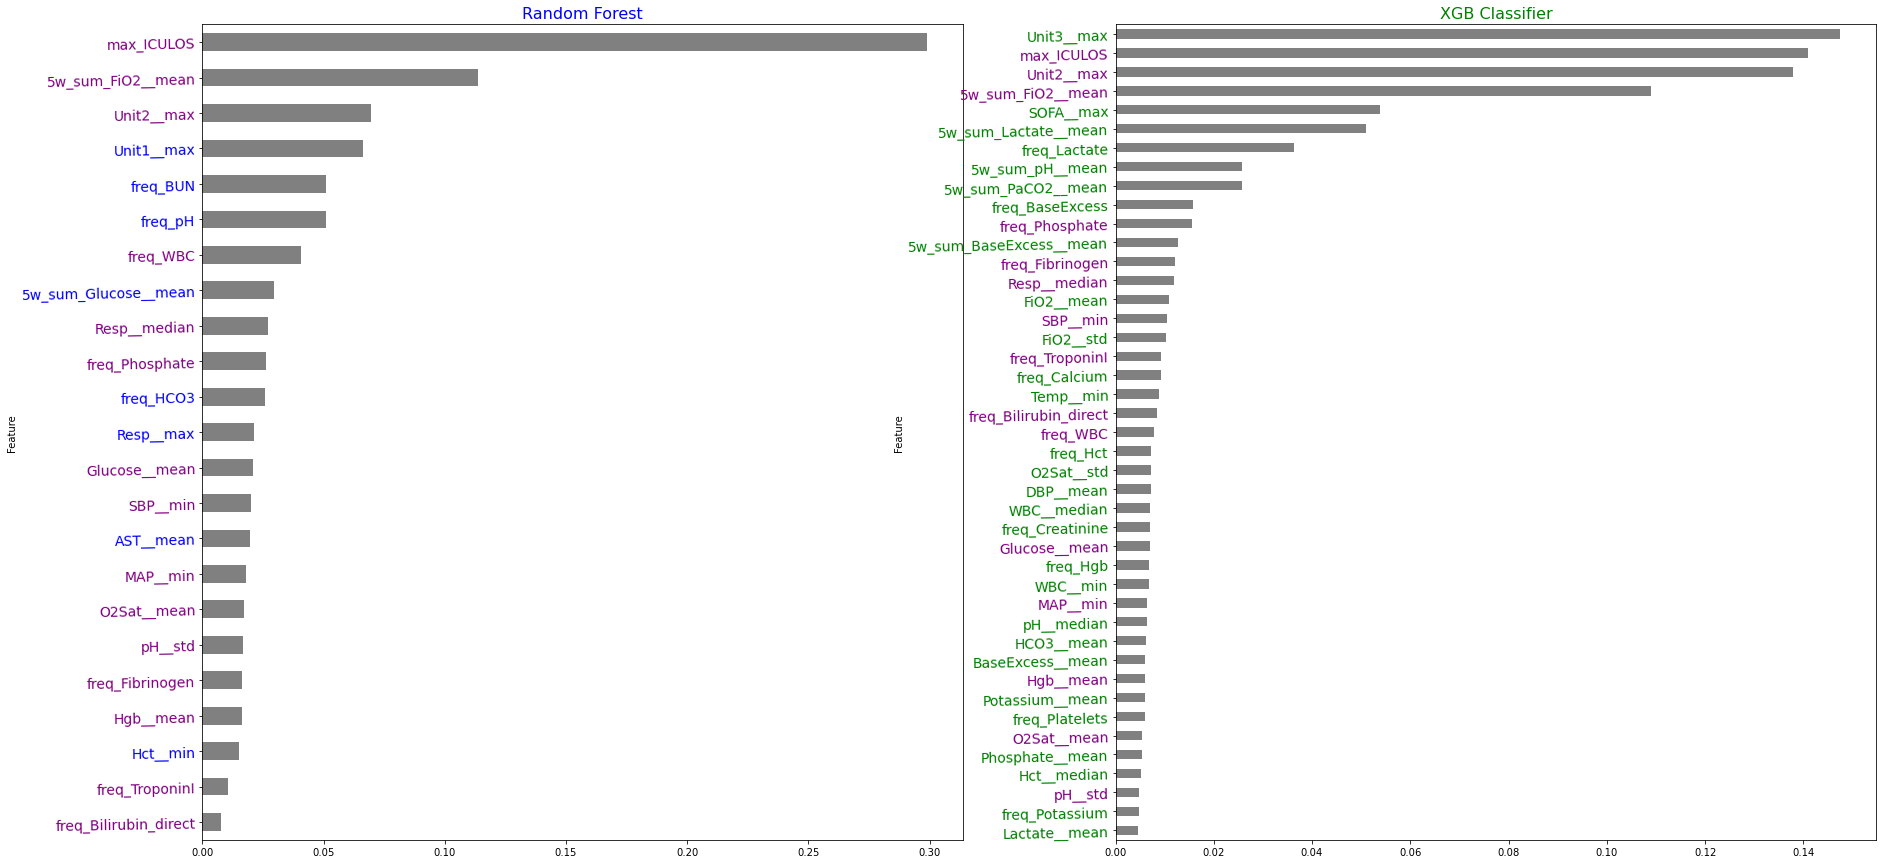

In [84]:
fig,axes = plt.subplots(1,2, figsize=(30,15))
resRF.sort_values(by=0).plot.barh(x='Feature',y=0,rot=1, ax = axes[0], color='grey')
resXGB.sort_values(by=0).plot.barh(x='Feature',y=0,rot=1, ax = axes[1], color='grey')
for i in RF_same_features:
    axes[0].get_yticklabels()[i].set_color('purple')
    axes[0].get_yticklabels()[i].set_fontsize(14)
for i in RF_diff:
    axes[0].get_yticklabels()[i].set_color('blue')
    axes[0].get_yticklabels()[i].set_fontsize(14)
for i in XGB_same_features:
    axes[1].get_yticklabels()[i].set_color('purple')
    axes[1].get_yticklabels()[i].set_fontsize(14)
for i in XGB_diff:
    axes[1].get_yticklabels()[i].set_color('green')
    axes[1].get_yticklabels()[i].set_fontsize(14)

axes[0].set_title('Random Forest', color='blue', fontsize=16)
axes[1].set_title('XGB Classifier', color='green', fontsize=16)
axes[0].get_legend().remove()
axes[1].get_legend().remove()

In [27]:
diff = [x for x in XGB_feature_names if x not in RFfeature_names]

In [29]:
same = [x for x in XGB_feature_names if x in RFfeature_names]

In [32]:
same

['max_ICULOS',
 'Glucose__mean',
 'SBP__min',
 'freq_TroponinI',
 '5w_sum_FiO2__mean',
 'Resp__median',
 'freq_Bilirubin_direct',
 'Hgb__mean',
 'freq_Fibrinogen',
 'pH__std',
 'freq_WBC',
 'freq_Phosphate',
 'MAP__min',
 'Unit2__max',
 'O2Sat__mean']